In [63]:
# https://github.com/amanchauhan786/AMANCHAUHAN22BCE0476-EDA-/blob/main/EDA%20DA%2022BCE0476.ipynb

In [64]:
#Aman Chauhan
#22BCE0476
# link:- https://github.com/amanchauhan786/AMANCHAUHAN22BCE0476-EDA-/blob/main/EDA%20DA%2022BCE0476.ipynb

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [66]:
# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)
print("Dataset shape:", df.shape)
print(df.head())
print(df.tail())
print(df.info())
print(df.describe)

Dataset shape: (200, 6)
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY
     Age Sex      BP Cholesterol  Na_to_K   Drug
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  199 non-null    object 
 4   Na_to_K      200 non-null    float64
 5

In [120]:
#  Data Transformation


In [68]:
# Data deduplication
df_deduplicated = df.drop_duplicates()
print("Rows removed after deduplication:", len(df) - len(df_deduplicated))

Rows removed after deduplication: 0


In [69]:
# Discretization and binning
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 70, 100], labels=['0-18', '19-30', '31-50', '51-70', '71+'])

In [70]:
# Handling missing data using different methods
print("\nMissing values before imputation:")
print(df.isnull().sum())


Missing values before imputation:
Age            0
Sex            0
BP             0
Cholesterol    1
Na_to_K        0
Drug           1
Age_Group      0
dtype: int64


In [71]:
# Simple Imputer
imputer_simple = SimpleImputer(strategy='most_frequent')
df_imputed_simple = pd.DataFrame(imputer_simple.fit_transform(df), columns=df.columns)


In [72]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# KNN Imputer
imputer_knn = KNNImputer(n_neighbors=5)
df[numerical_cols] = imputer_knn.fit_transform(df[numerical_cols])

In [73]:
print("\nMissing values after Simple Imputation:")
print(df_imputed_simple.isnull().sum())
print("\nMissing values after KNN Imputation:")
print(df.isnull().sum())


Missing values after Simple Imputation:
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
Age_Group      0
dtype: int64

Missing values after KNN Imputation:
Age            0
Sex            0
BP             0
Cholesterol    1
Na_to_K        0
Drug           1
Age_Group      0
dtype: int64


In [74]:

print("\n---  Correlation Analysis ---")


---  Correlation Analysis ---


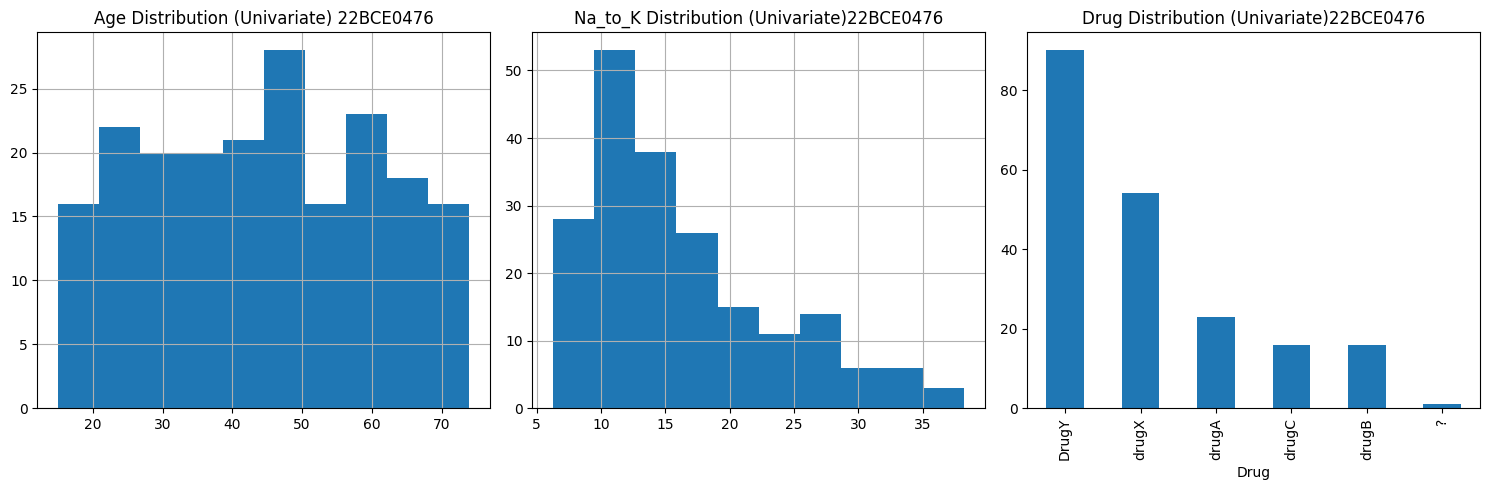

In [121]:
# Univariate analysis
plt.figure(figsize=(15, 5))
plt.subplot(131)
df_imputed_simple['Age'].hist()
plt.title('Age Distribution (Univariate) 22BCE0476')
plt.subplot(132)
df_imputed_simple['Na_to_K'].hist()
plt.title('Na_to_K Distribution (Univariate)22BCE0476')
plt.subplot(133)
df_imputed_simple['Drug'].value_counts().plot(kind='bar')
plt.title('Drug Distribution (Univariate)22BCE0476')
plt.tight_layout()
plt.show()

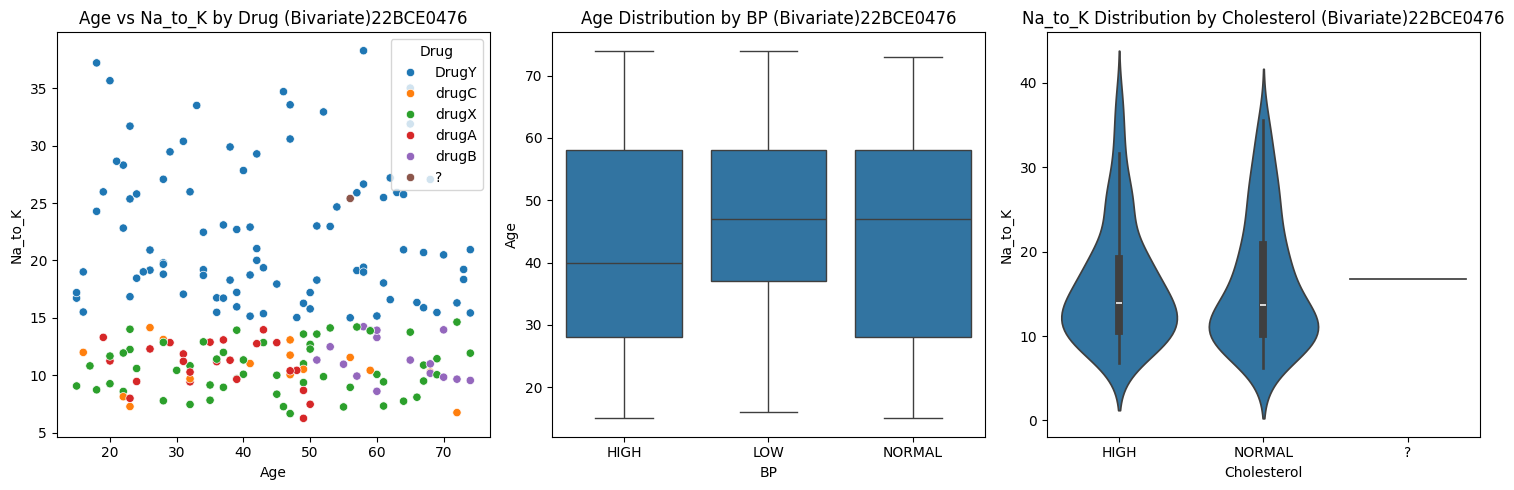

In [122]:
# Bivariate analysis
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.scatterplot(data=df_imputed_simple, x='Age', y='Na_to_K', hue='Drug')
plt.title('Age vs Na_to_K by Drug (Bivariate)22BCE0476')
plt.subplot(132)
sns.boxplot(data=df_imputed_simple, x='BP', y='Age')
plt.title('Age Distribution by BP (Bivariate)22BCE0476')
plt.subplot(133)
sns.violinplot(data=df_imputed_simple, x='Cholesterol', y='Na_to_K')
plt.title('Na_to_K Distribution by Cholesterol (Bivariate)22BCE0476')
plt.tight_layout()
plt.show()

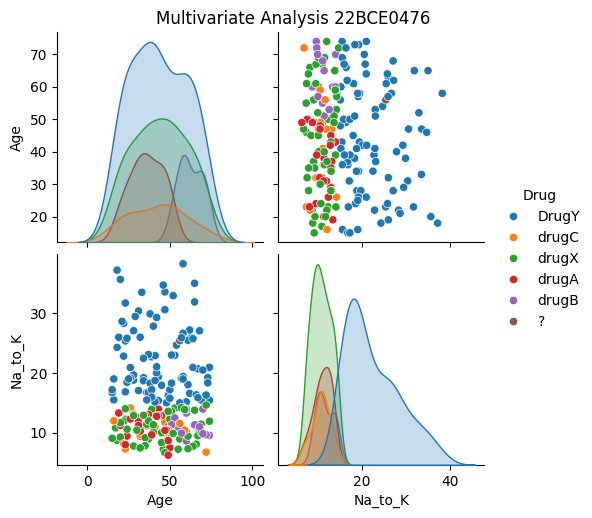

In [123]:
# Create the pairplot with only numerical variables
sns.pairplot(df_imputed_simple, hue='Drug', vars=['Age', 'Na_to_K'])
plt.suptitle('Multivariate Analysis 22BCE0476', y=1.02)
plt.show()

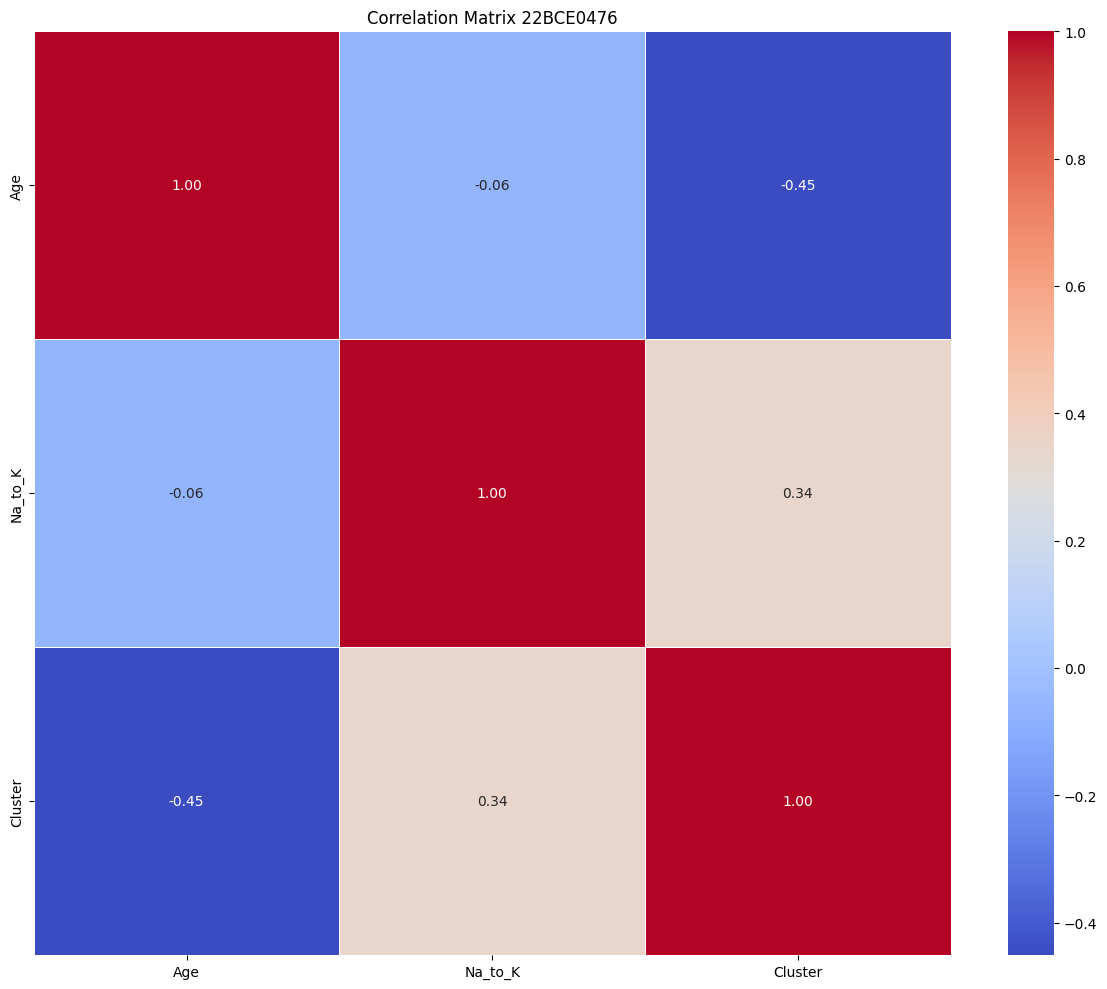

In [124]:
# Function to convert age ranges to numeric values
def age_to_numeric(age):
    if isinstance(age, str) and '-' in age:
        low, high = map(int, age.split('-'))
        return (low + high) / 2
    return age

# Apply the conversion to the Age column
df['Age'] = df['Age'].apply(age_to_numeric)

# Perform one-hot encoding for categorical variables
categorical_cols = ['Sex', 'BP', 'Cholesterol', 'Drug']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Drop rows with missing values
df_cleaned = df_encoded.dropna()

# Select only numeric columns for correlation
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
df_numeric = df_cleaned[numeric_cols]

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix 22BCE0476')
plt.tight_layout()
plt.show()

In [79]:

print("\n---  Data Summarization and Visualization ---")


---  Data Summarization and Visualization ---


In [80]:
# Statistical summary
print("Statistical Summary:")
print(df_imputed_simple.describe())

Statistical Summary:
        Age  Sex    BP Cholesterol  Na_to_K   Drug Age_Group
count   200  200   200         200  200.000    200       200
unique   57    2     3           3  198.000      6         5
top      47    M  HIGH        HIGH   12.006  DrugY     31-50
freq      8  104    77         103    2.000     90        79


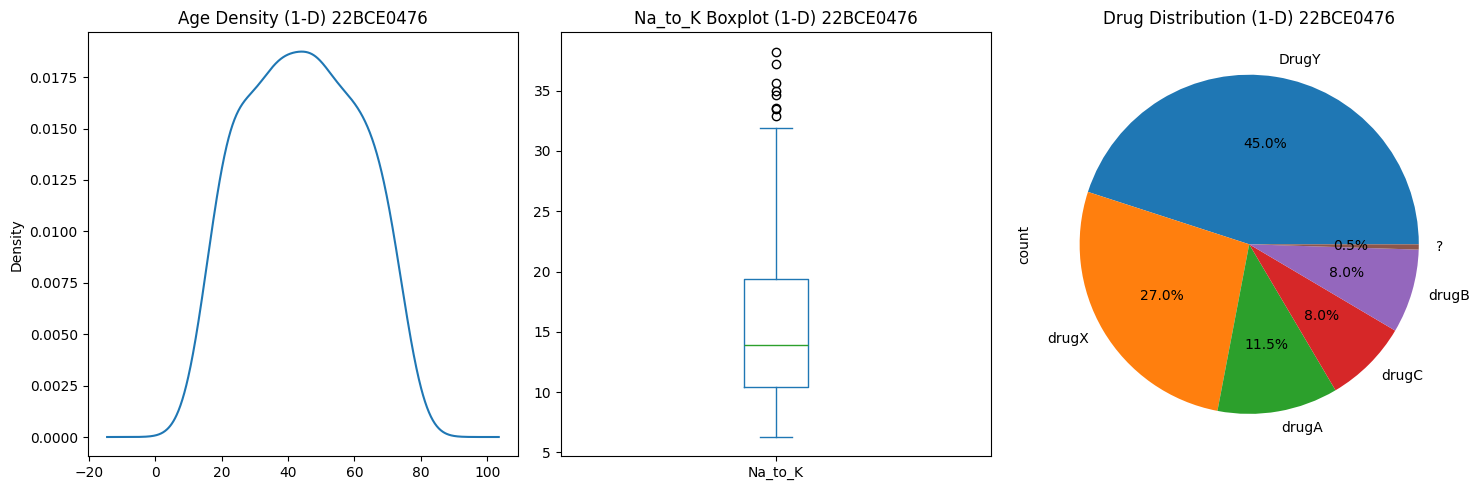

In [125]:
# 1-D Statistical data analysis
plt.figure(figsize=(15, 5))
plt.subplot(131)
df_imputed_simple['Age'].plot(kind='kde')
plt.title('Age Density (1-D) 22BCE0476')
plt.subplot(132)
df_imputed_simple['Na_to_K'].plot(kind='box')
plt.title('Na_to_K Boxplot (1-D) 22BCE0476')
plt.subplot(133)
df_imputed_simple['Drug'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Drug Distribution (1-D) 22BCE0476')
plt.tight_layout()
plt.show()

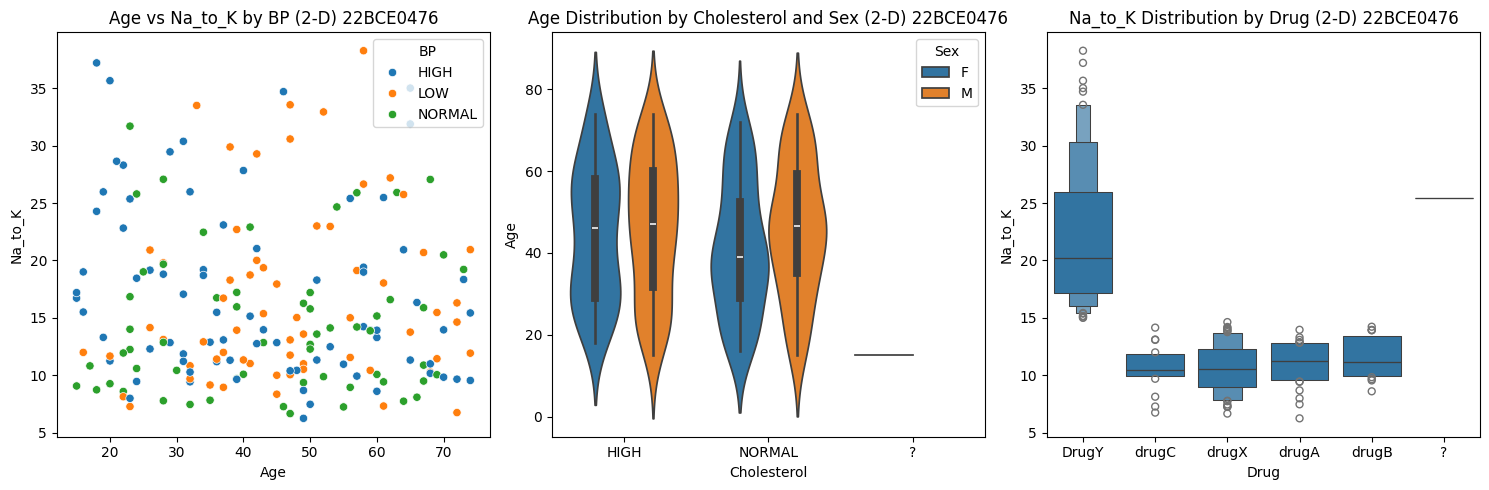

In [126]:
# 2-D Statistical data analysis
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.scatterplot(data=df_imputed_simple, x='Age', y='Na_to_K', hue='BP')
plt.title('Age vs Na_to_K by BP (2-D) 22BCE0476')
plt.subplot(132)
sns.violinplot(data=df_imputed_simple, x='Cholesterol', y='Age', hue='Sex')
plt.title('Age Distribution by Cholesterol and Sex (2-D) 22BCE0476')
plt.subplot(133)
sns.boxenplot(data=df_imputed_simple, x='Drug', y='Na_to_K')
plt.title('Na_to_K Distribution by Drug (2-D) 22BCE0476')
plt.tight_layout()
plt.show()

In [83]:
# Contingency tables and mosaic plot
cont_table = pd.crosstab(df_imputed_simple['BP'], df_imputed_simple['Cholesterol'])
print("\nContingency Table (BP vs Cholesterol):")
print(cont_table)


Contingency Table (BP vs Cholesterol):
Cholesterol  ?  HIGH  NORMAL
BP                          
HIGH         1    35      41
LOW          0    31      33
NORMAL       0    37      22


<Figure size 1000x800 with 0 Axes>

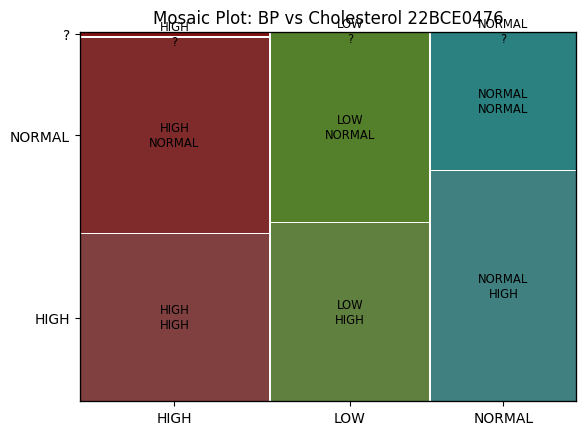

In [127]:
plt.figure(figsize=(10, 8))
mosaic(df_imputed_simple, ['BP', 'Cholesterol'])
plt.title('Mosaic Plot: BP vs Cholesterol 22BCE0476')
plt.show()

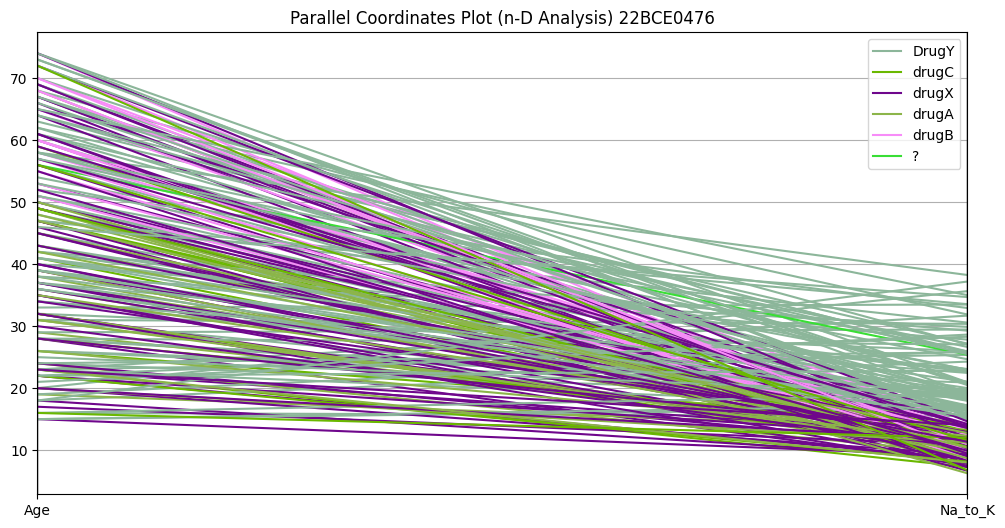

In [128]:
# n-D Statistical data analysis (using parallel coordinates plot)
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df_imputed_simple, 'Drug', cols=['Age', 'Na_to_K'])
plt.title('Parallel Coordinates Plot (n-D Analysis) 22BCE0476')
plt.show()

In [86]:
# Range
range_age = df['Age'].max() - df['Age'].min()

# Interquartile Range (IQR)
iqr_age = stats.iqr(df['Age'])

# Interdecile Range
interdecile_range_age = df['Age'].quantile(0.9) - df['Age'].quantile(0.1)

# Mean
mean_age = df['Age'].mean()
mean_Na_to_K = df['Na_to_K'].mean()

# Median and Quantiles
median_age = df['Age'].median()
median_Na_to_K = df['Na_to_K'].median()

# Quantiles, Deciles, and Percentiles
quantiles_age = df['Age'].quantile([0.25, 0.5, 0.75])  # Quartiles
deciles_age = df['Age'].quantile(np.linspace(0.1, 0.9, 9))  # Deciles
percentiles_age = df['Age'].quantile(np.linspace(0.01, 0.99, 99))  # Percentiles

print("Mean (Age):", mean_age)
print("Median (Age):", median_age)
print("Quantiles (Age):", quantiles_age)
print("Deciles (Age):", deciles_age)
print("Percentiles (Age):", percentiles_age)


Mean (Age): 44.315
Median (Age): 45.0
Quantiles (Age): 0.25    31.0
0.50    45.0
0.75    58.0
Name: Age, dtype: float64
Deciles (Age): 0.1    22.0
0.2    28.0
0.3    34.0
0.4    39.0
0.5    45.0
0.6    49.0
0.7    56.0
0.8    60.2
0.9    67.1
Name: Age, dtype: float64
Percentiles (Age): 0.01    15.00
0.02    16.00
0.03    16.97
0.04    18.00
0.05    18.95
        ...  
0.95    70.10
0.96    72.00
0.97    72.03
0.98    73.02
0.99    74.00
Name: Age, Length: 99, dtype: float64


In [87]:
# Standard Deviation and Mean Deviation
std_dev_age = df['Age'].std()
mean_dev_age = np.mean(np.abs(df['Age'] - df['Age'].mean()))  # Mean Absolute Deviation

# Skewness and Kurtosis
skewness_age = stats.skew(df['Age'])
kurtosis_age = stats.kurtosis(df['Age'])

print("Standard Deviation (Age):", std_dev_age)
print("Mean Absolute Deviation (Age):", mean_dev_age)
print("Skewness (Age):", skewness_age)
print("Kurtosis (Age):", kurtosis_age)


Standard Deviation (Age): 16.544314634751967
Mean Absolute Deviation (Age): 14.13185
Skewness (Age): 0.030080569120025984
Kurtosis (Age): -1.0907797598806772


In [88]:
# Frequency Distribution
freq_dist_age = df['Age'].value_counts().sort_index()
#print("Frequency Distribution (Age):")
#print(freq_dist_age)


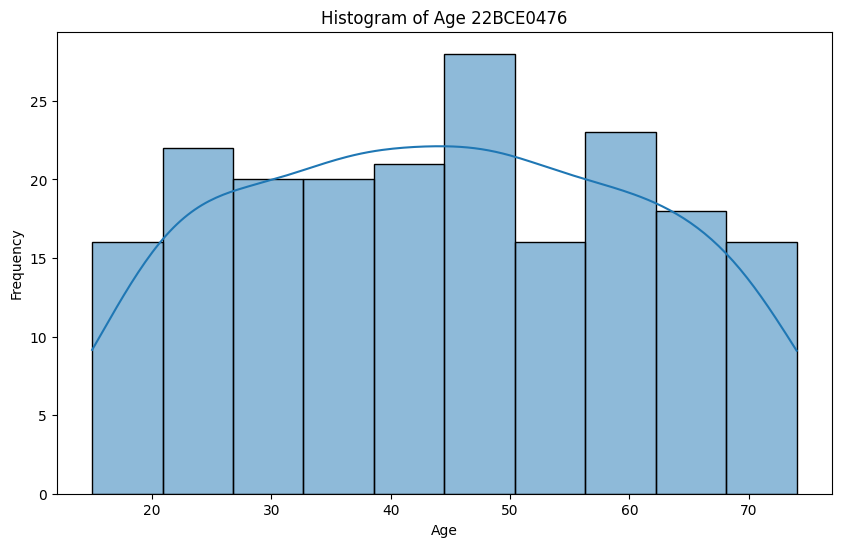

In [129]:
# Frequency Distribution for 'Age'
freq_dist_age = df['Age'].value_counts().sort_index()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=10)  # Bins set to customize granularity
plt.title('Histogram of Age 22BCE0476')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Relative Frequency Distribution for 'Age'
relative_freq_age = freq_dist_age / len(df)
#print("Relative Frequency Distribution (Age):")
#print(relative_freq_age)

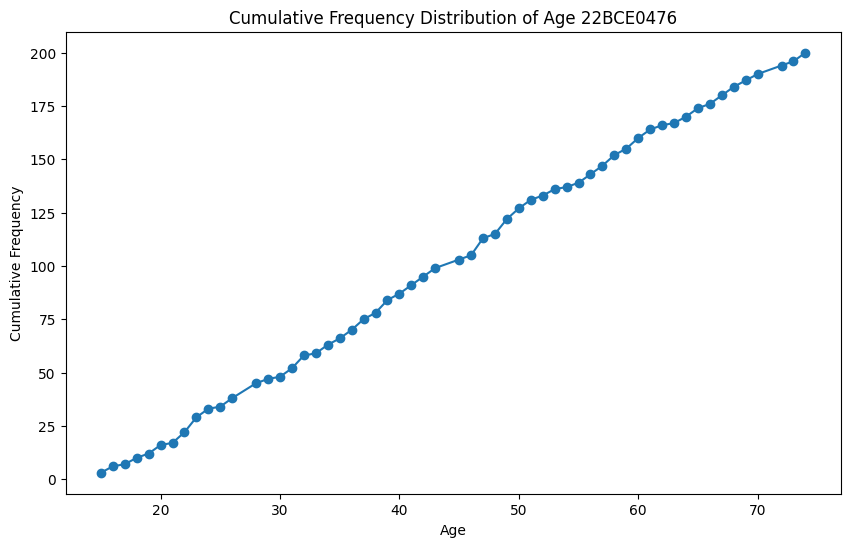

In [130]:
# Cumulative Frequency
cumulative_freq_age = freq_dist_age.cumsum()
#print("Cumulative Frequency Distribution (Age):")
#print(cumulative_freq_age)

# Plot Cumulative Frequency Distribution
plt.figure(figsize=(10, 6))
plt.plot(cumulative_freq_age, marker='o')
plt.title('Cumulative Frequency Distribution of Age 22BCE0476')
plt.xlabel('Age')
plt.ylabel('Cumulative Frequency')
plt.show()


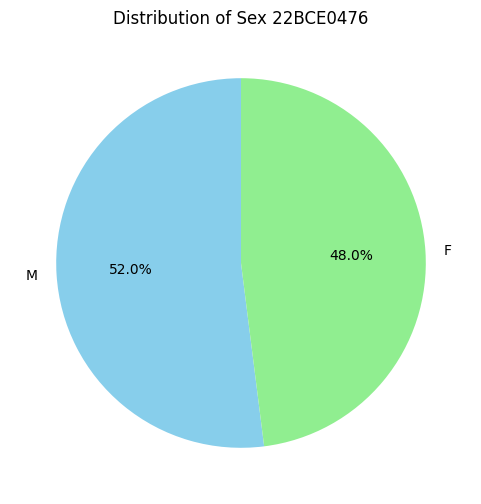

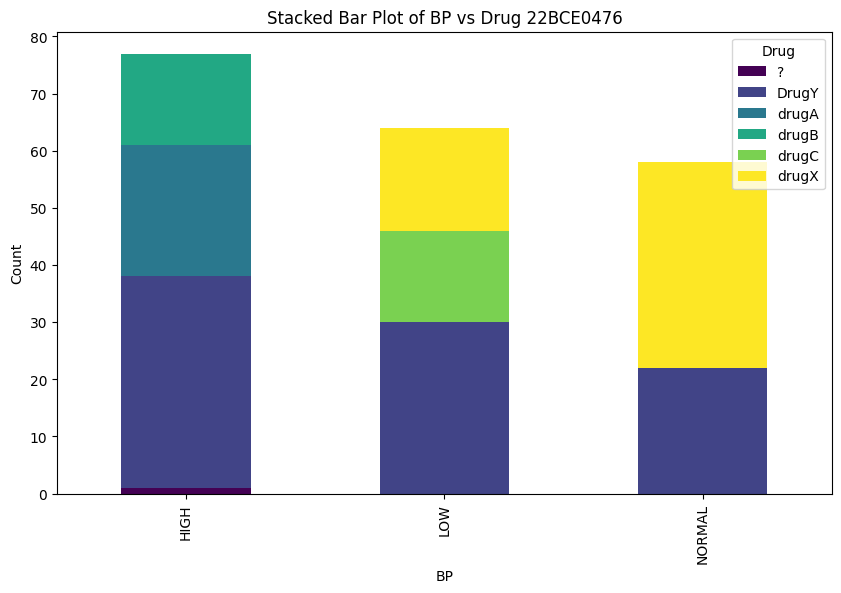

In [132]:
# Pie Chart for Sex
plt.figure(figsize=(6, 6))
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Sex 22BCE0476')
plt.ylabel('')
plt.show()

# Stacked Bar Plot for BP vs Drug
bp_drug_counts = pd.crosstab(df['BP'], df['Drug'])
bp_drug_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Stacked Bar Plot of BP vs Drug 22BCE0476')
plt.xlabel('BP')
plt.ylabel('Count')
plt.show()


In [92]:
# Categorical-Categorical (e.g., Sex and Drug)
contingency_cat_cat = pd.crosstab(df['Sex'], df['Drug'])
print("Categorical-Categorical Contingency Table (Sex vs Drug):")
print(contingency_cat_cat)

# Numerical-Numerical (Correlation matrix for numerical columns)
numerical_cols = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_cols.corr()
print("Numerical-Numerical Correlation Matrix:")
print(correlation_matrix)

# Categorical-Numerical (Mean Age by Drug)
cat_num_table = df.groupby('Drug')['Age'].mean()
print("Categorical-Numerical Table (Mean Age by Drug):")
print(cat_num_table)


Categorical-Categorical Contingency Table (Sex vs Drug):
Drug  ?  DrugY  drugA  drugB  drugC  drugX
Sex                                       
F     1     46      9      6      7     27
M     0     43     14     10      9     27
Numerical-Numerical Correlation Matrix:
              Age   Na_to_K
Age      1.000000 -0.063119
Na_to_K -0.063119  1.000000
Categorical-Numerical Table (Mean Age by Drug):
Drug
?        56.000000
DrugY    43.786517
drugA    35.869565
drugB    62.500000
drugC    42.500000
drugX    44.018519
Name: Age, dtype: float64


In [93]:
contingency_3way = pd.crosstab([df['Sex'], df['BP']], df['Drug'])
print("3-Way Contingency Table (Sex, BP, Drug):")
print(contingency_3way)


3-Way Contingency Table (Sex, BP, Drug):
Drug        ?  DrugY  drugA  drugB  drugC  drugX
Sex BP                                          
F   HIGH    1     22      9      6      0      0
    LOW     0     13      0      0      7      8
    NORMAL  0     11      0      0      0     19
M   HIGH    0     15     14     10      0      0
    LOW     0     17      0      0      9     10
    NORMAL  0     11      0      0      0     17


In [94]:
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

In [95]:
# Row Profile
row_profile = contingency_cat_cat.div(contingency_cat_cat.sum(axis=1), axis=0)
print("Row Profile (Sex vs Drug):")
print(row_profile)

# Column Profile
column_profile = contingency_cat_cat.div(contingency_cat_cat.sum(axis=0), axis=1)
print("Column Profile (Sex vs Drug):")
print(column_profile)

# Relative Frequency
relative_freq = contingency_cat_cat / contingency_cat_cat.values.sum()
print("Relative Frequency (Sex vs Drug):")
print(relative_freq)

# Chi-Square Test
chi2, p, dof, ex = chi2_contingency(contingency_cat_cat)
print("Chi-Square Test Result:")
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(ex)


Row Profile (Sex vs Drug):
Drug         ?     DrugY     drugA     drugB     drugC     drugX
Sex                                                             
F     0.010417  0.479167  0.093750  0.062500  0.072917  0.281250
M     0.000000  0.417476  0.135922  0.097087  0.087379  0.262136
Column Profile (Sex vs Drug):
Drug    ?     DrugY     drugA  drugB   drugC  drugX
Sex                                                
F     1.0  0.516854  0.391304  0.375  0.4375    0.5
M     0.0  0.483146  0.608696  0.625  0.5625    0.5
Relative Frequency (Sex vs Drug):
Drug         ?     DrugY     drugA     drugB     drugC     drugX
Sex                                                             
F     0.005025  0.231156  0.045226  0.030151  0.035176  0.135678
M     0.000000  0.216080  0.070352  0.050251  0.045226  0.135678
Chi-Square Test Result:
Chi-Square Statistic: 3.1958032646391916
p-value: 0.6698279358498227
Degrees of Freedom: 5
Expected Frequencies:
[[ 0.48241206 42.93467337 11.09547739  7.718

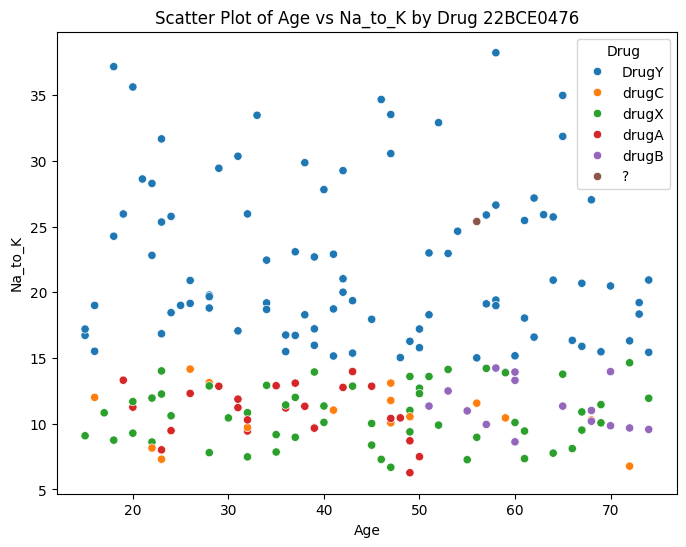

In [133]:
# Scatter plot of Age vs Na_to_K with hue for Drug
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Na_to_K', hue='Drug')
plt.title("Scatter Plot of Age vs Na_to_K by Drug 22BCE0476")
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()


In [97]:
#k- means clustering

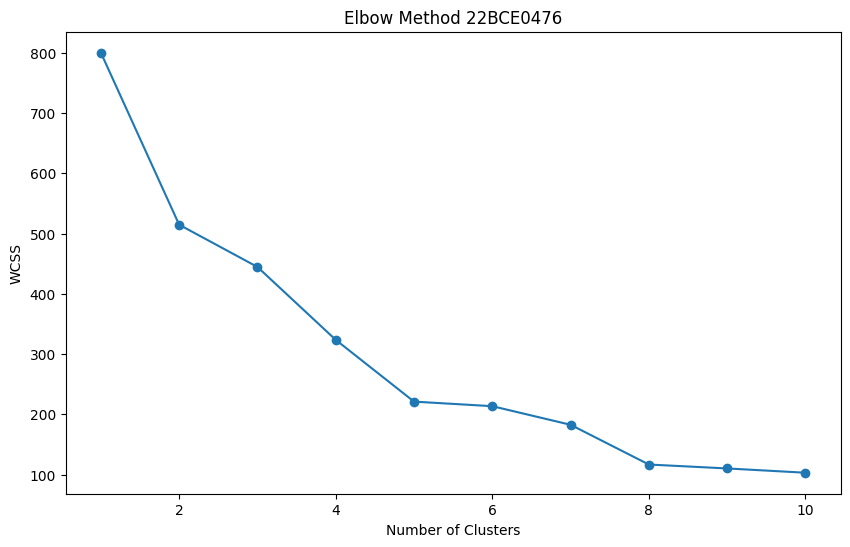

In [135]:
# Select numeric columns for clustering
numeric_df = df.select_dtypes(include=[np.number])

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method 22BCE0476')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

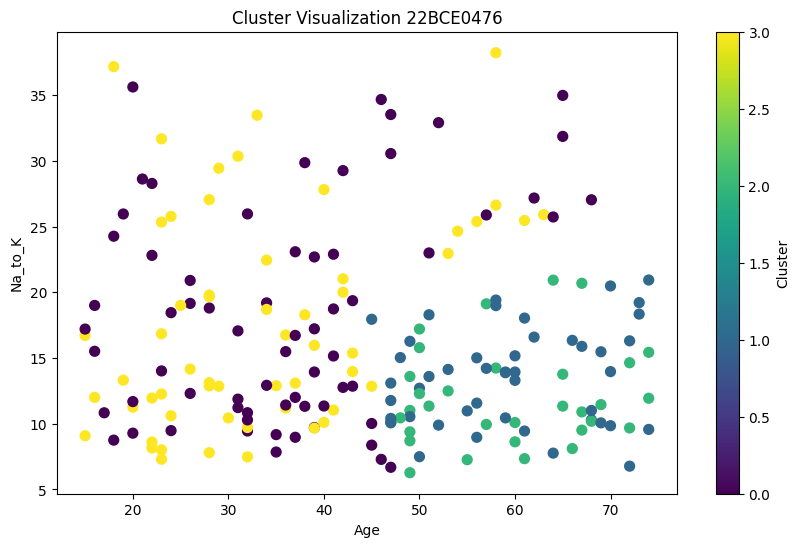

In [136]:
# Choose the optimal number of clusters (based on the elbow in the plot)
optimal_clusters = 4  # Change based on elbow plot

# Fit K-means to the dataset
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Na_to_K'], c=df['Cluster'], cmap='viridis', marker='o', s=50)
plt.title('Cluster Visualization 22BCE0476')
plt.xlabel('Age')
plt.ylabel('Na_to_K')
plt.colorbar(label='Cluster')
plt.show()

In [100]:
#Hierarachial CLustering

In [101]:
# Select numeric columns for clustering
numeric_df = df.select_dtypes(include=[np.number])

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

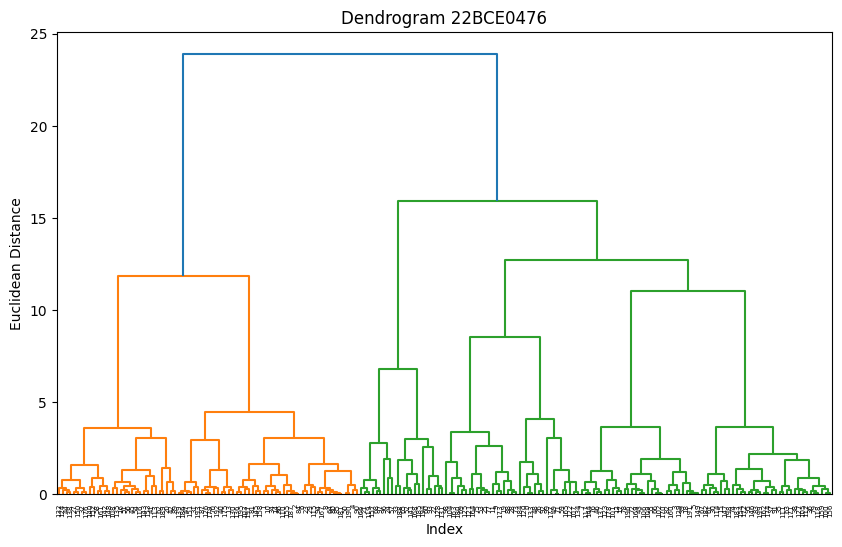

In [137]:
# Perform hierarchical/agglomerative clustering using 'ward' linkage
linked = linkage(scaled_data, method='ward')

# Create a dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Dendrogram 22BCE0476')
plt.xlabel('Index')
plt.ylabel('Euclidean Distance')
plt.show()


In [103]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [104]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering with the number of clusters selected from the dendrogram
n_clusters = 4  # Change this based on the dendrogram observation

# Agglomerative Clustering with the 'ward' linkage method
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df['Cluster'] = agg_clustering.fit_predict(scaled_data)


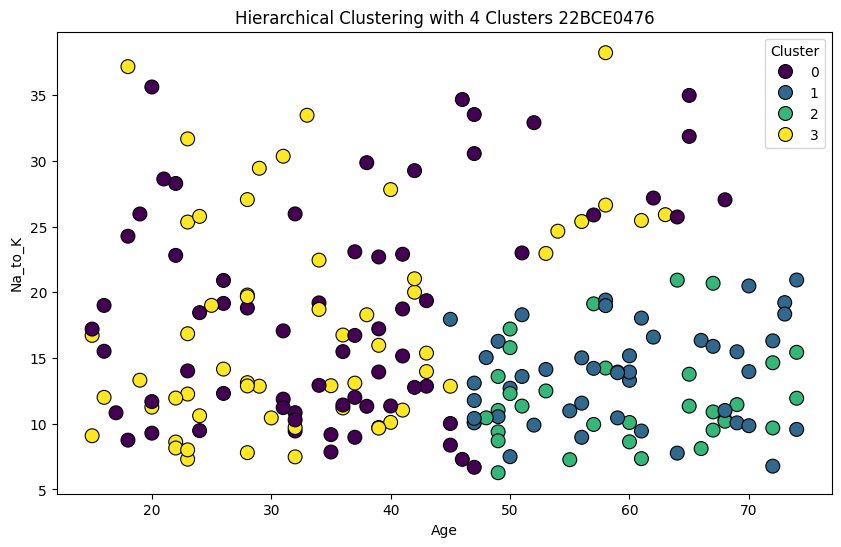

In [138]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Na_to_K', hue='Cluster', palette='viridis', s=100, edgecolor='black')
plt.title(f'Hierarchical Clustering with {n_clusters} Clusters 22BCE0476')
plt.xlabel('Age')
plt.ylabel('Na_to_K')
plt.legend(title='Cluster')
plt.show()


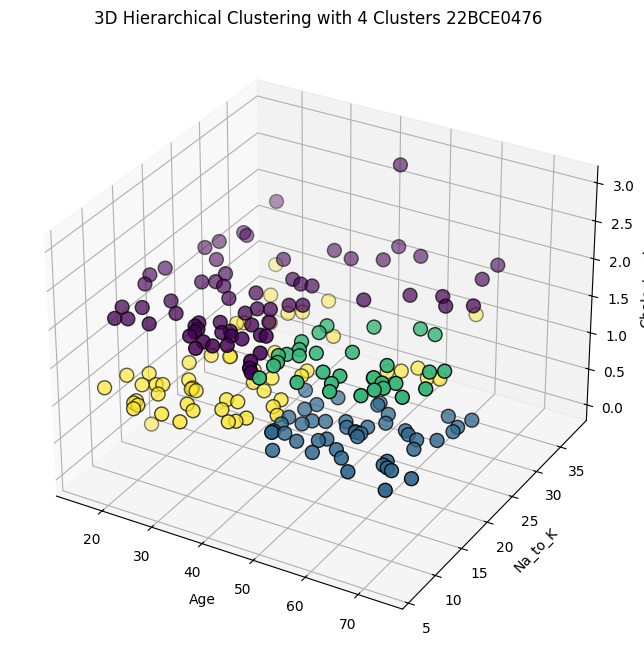

In [139]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numerical using LabelEncoder
label_encoder = LabelEncoder()
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])  # Encodes 'HIGH' -> 0, 'NORMAL' -> 1, 'LOW' -> 2

# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D (using Age, Na_to_K, and Cholesterol as the axes)
ax.scatter(df['Age'], df['Na_to_K'], df['Cholesterol'], c=df['Cluster'], cmap='viridis', s=100, edgecolors='k')

# Labels and Title
ax.set_title(f'3D Hierarchical Clustering with {n_clusters} Clusters 22BCE0476')
ax.set_xlabel('Age')
ax.set_ylabel('Na_to_K')
ax.set_zlabel('Cholesterol')

plt.show()


In [107]:
#principle component analysis

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [109]:
# Select numeric columns for PCA (exclude categorical columns like 'Drug', 'Sex', 'BP', 'Cholesterol')
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

# Step 3: Perform PCA
pca = PCA()
pca.fit(scaled_data)


PCA()

Eigenvalues (Variance Explained by Each Component):
[1.63635258 0.99203821 0.93284295 0.45886676]

Component Loadings (Principal Components):
[[-0.54290738  0.22219408  0.44113345  0.67917792]
 [ 0.43822179  0.86932832  0.21607307 -0.0744471 ]
 [ 0.45170043 -0.42370512  0.78507078 -0.01022517]
 [ 0.55603953 -0.12398401 -0.37732953  0.73011672]]


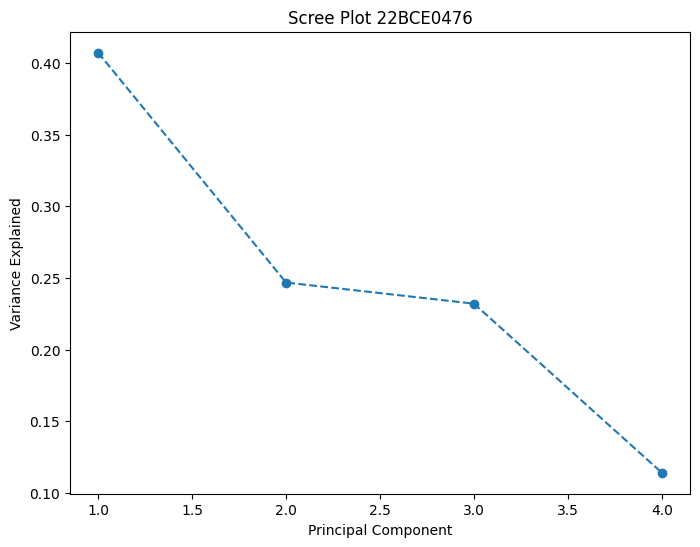

In [140]:
# Step 4: Print PCA results (eigenvalues and component loadings)
print("Eigenvalues (Variance Explained by Each Component):")
print(pca.explained_variance_)
print("\nComponent Loadings (Principal Components):")
print(pca.components_)

# Step 5: Visualize PCA components
# Plot the explained variance (scree plot)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot 22BCE0476')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [111]:
# Step 6: Create a scree plot to determine the optimal number of components
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 7: Select the number of components based on the scree plot
# Let's assume we select the first 3 components (adjust based on scree plot)
n_comp = 3

# Step 8: Perform PCA with the selected components
pca_selected = PCA(n_components=n_comp)
principal_components = pca_selected.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_comp)])


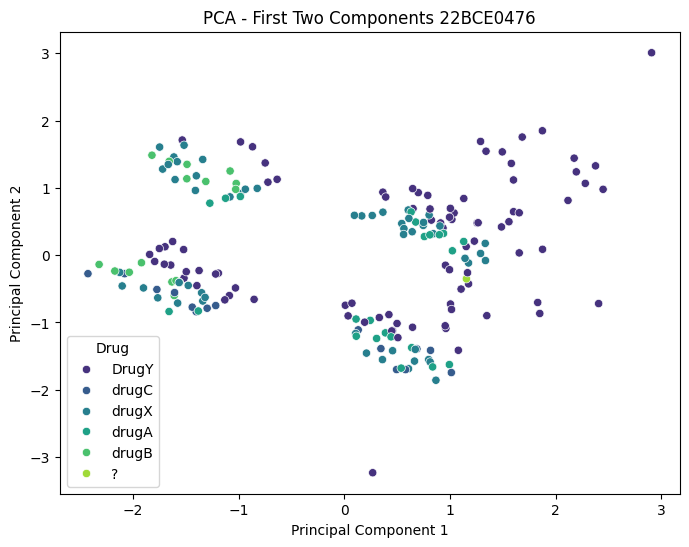


Explained Variance by the selected 3 components:
[0.40704271 0.2467695  0.23204468]


In [141]:
# Step 9: Plot the selected PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=df['Drug'], palette='viridis')
plt.title('PCA - First Two Components 22BCE0476')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Step 10: Interpret the results using summary
# Explained variance by the selected components
print(f"\nExplained Variance by the selected {n_comp} components:")
print(pca_selected.explained_variance_ratio_)

In [113]:
# Total variance explained by the selected components
total_variance = np.sum(pca_selected.explained_variance_ratio_)
print(f"\nTotal Variance Explained by {n_comp} components: {total_variance:.2f}")


Total Variance Explained by 3 components: 0.89


In [114]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
#model

In [116]:
# Select the numeric columns for features
numeric_columns = df.select_dtypes(include=[np.number]).columns

# You can choose any numeric column as the target, here I'm using 'Age' as an example
X = df[numeric_columns].drop(columns='Age')  # Features (all numeric columns except Age)
y = df['Age']  # Target (Age)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Mean Squared Error (MSE): 264.61
R-squared: 0.14


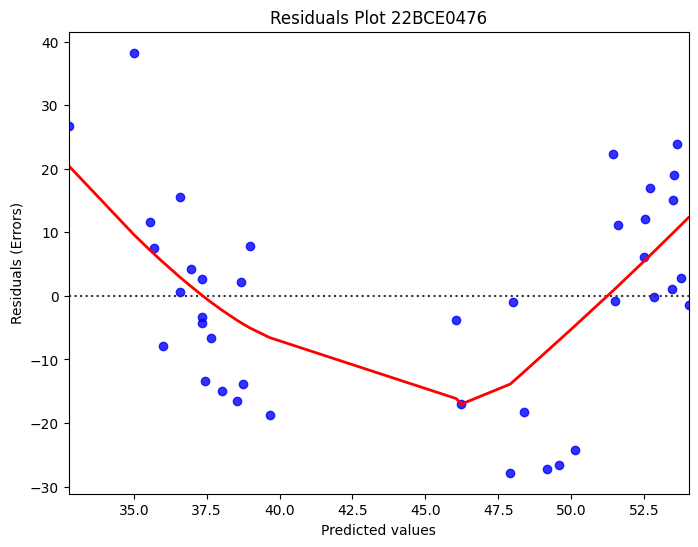

In [142]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot residuals (errors)
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color="blue", line_kws={"color": "red", "lw": 2})
plt.title("Residuals Plot 22BCE0476")
plt.xlabel("Predicted values")
plt.ylabel("Residuals (Errors)")
plt.show()

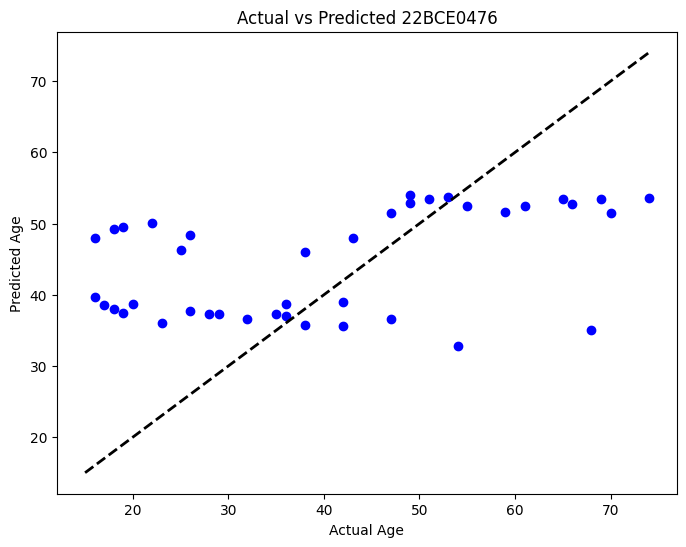


Linear Regression Coefficients:
             Coefficient
Cholesterol     1.678274
Na_to_K         0.239892
Cluster        -7.413740


In [143]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Actual vs Predicted 22BCE0476')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.show()

# Coefficients of the linear regression model
print("\nLinear Regression Coefficients:")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


In [119]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 264.61
Root Mean Squared Error (RMSE): 16.27
R-squared (R²): 0.14
